<style>
div.cell, div.text_cell_render{
  max-width:760px;
  margin-left:auto;
  margin-right:auto;
}

.rendered_html
{
  font-size: 130%;
  }

.rendered_html li
{
  line-height: 1.;
  }

.rendered_html h1, h2 {
  font-familly:"Charis SIL", serif;
}

img { 
    max-width: 200% !important;
    height: auto !important;
}

.input_prompt, .CodeMirror-lines, .output_area
{
  font-family: Consolas, monospace;
  font-size: 120%;
}
</style>

# MATH5016 Scientific Python programming
From: Prof. Roberta Sinatra and Johannes Wachs

We use materials, code and ideas from the tutorials of [Greg Reda](https://github.com/gjreda/pydata2014nyc/blob/master/demo.ipynb) and [Tom Augspurger](http://tomaugspurger.github.io/modern-1.html).


### Today's plan:

Introduce and explore [Pandas](http://pandas.pydata.org/), a library for data analysis that makes the following (and more) very straightforward:
- Reading in data
- Cleaning it up
- Basic analysis
- Plotting

Pandas brings tools and ideas from Excel, R, and SQL to Python.

We'll have a look at the basic data structures: Series and Dataframes. Then we'll look at a dataset about the passengers of the Titanic.

# Part I: Pandas and its data structures
## Series and Dataframes



In [1]:
#we typically import pandas with the alias pd (a la import numpy as np)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas has two primary data structures: series and dataframes. Series are similar to Python lists or numpy vectors: they are one dimensional. They are more flexible. They can contain ***mixed types***!

In [2]:
#create a series
my_first_series = pd.Series([3.0,2,1,'shoe',1.5,['apple','banana'],2,3.0,100])
print(my_first_series)

0                  3
1                  2
2                  1
3               shoe
4                1.5
5    [apple, banana]
6                  2
7                  3
8                100
dtype: object


When we create the series, notice that we also get a column number each row. This is the index of our series. 

In [3]:
#access the values and indices:
print (my_first_series.values)
print (my_first_series.index)

[3.0 2 1 'shoe' 1.5 list(['apple', 'banana']) 2 3.0 100]
RangeIndex(start=0, stop=9, step=1)


What's the advantage? Well we can look up values by their index using the same list/numpy slicing syntax we know:

In [4]:
print(my_first_series[2:5])

2       1
3    shoe
4     1.5
dtype: object


In [5]:
#note if we look up a single row, the Series returns the value!
print(my_first_series[4])

1.5


At the same time we can filter based on values:

In [6]:
just_threes= my_first_series[my_first_series == 3]
print(just_threes)

0    3
7    3
dtype: object


If our Series has all the same types, we can apply numpy functions to the entire array:

In [7]:
print(just_threes*2)

def square(x):
    return x**2
def mul2(x):
    return x*2

print(just_threes.apply(square))
print("----------------------------")
print(my_first_series.apply(mul2))

0    6
7    6
dtype: object
0    9.0
7    9.0
dtype: float64
----------------------------
0                                 6
1                                 4
2                                 2
3                          shoeshoe
4                                 3
5    [apple, banana, apple, banana]
6                                 4
7                                 6
8                               200
dtype: object


We can convert Python dictionaries to Pandas Series:

In [8]:
#let's create a dict of the average movie ratings from 1 to 10 of actors.
actor_rating_dict = {'Nicolas Cage':3,'Robert Redford':5,'Julianne Moore':8,
                     'Jeff Bridges':7, 'Idris Elba':8,'Meryl Streep':9,
                     'Pam Grier':9,'Dorottya Udvaros':7.5
                     }
actor_rating_series =pd.Series(actor_rating_dict)
#note the keys are mapped to indices! The index is not always numeric!
print(actor_rating_series)

Nicolas Cage        3.0
Robert Redford      5.0
Julianne Moore      8.0
Jeff Bridges        7.0
Idris Elba          8.0
Meryl Streep        9.0
Pam Grier           9.0
Dorottya Udvaros    7.5
dtype: float64


In [9]:
#look up by index name
print(actor_rating_series['Idris Elba'])
#look up by index position
print(actor_rating_series[0])

8.0
3.0


In [10]:
#creating another series: this time how many movies an actor has played in.
actor_frequency_dict = {'Nicolas Cage':20,'Robert Redford':6,
                        'Julianne Moore':10, 'Jeff Bridges':2,
                        'Idris Elba':14,'Mr. Bean':3,'Meryl Streep':7,
                        'Pam Grier':11,'Dorottya Udvaros':5}

actor_frequency_series = pd.Series(actor_frequency_dict)
actor_frequency_series

Nicolas Cage        20
Robert Redford       6
Julianne Moore      10
Jeff Bridges         2
Idris Elba          14
Mr. Bean             3
Meryl Streep         7
Pam Grier           11
Dorottya Udvaros     5
dtype: int64

In [11]:
#Cast to a numpy array by using .values
actor_frequency_series.values

array([20,  6, 10,  2, 14,  3,  7, 11,  5], dtype=int64)

### We can combine series with the concat command. What results is a Dataframe!

In [12]:
df = pd.concat([actor_rating_series,actor_frequency_series],axis=1,sort=True)
df

,0,1
Dorottya Udvaros,7.5,5
Idris Elba,8.0,14
Jeff Bridges,7.0,2
Julianne Moore,8.0,10
Meryl Streep,9.0,7
Mr. Bean,NaN,3
Nicolas Cage,3.0,20
Pam Grier,9.0,11
Robert Redford,5.0,6


### Question 1
What happens if we exclude axis=1 from the concat command?

### Question 2
What does Mr. Bean's "NaN" mean?

In [13]:
#let's rename the columns:
df.columns = ['Average_Rating','Number_of_Movies']
df

,Average_Rating,Number_of_Movies
Dorottya Udvaros,7.5,5
Idris Elba,8.0,14
Jeff Bridges,7.0,2
Julianne Moore,8.0,10
Meryl Streep,9.0,7
Mr. Bean,NaN,3
Nicolas Cage,3.0,20
Pam Grier,9.0,11
Robert Redford,5.0,6


In [14]:
#we can query rows by index using index value (loc) or position (iloc).
print(df.loc['Mr. Bean'])
print('-------------')
print(df.iloc[3])
print('-------------')

Average_Rating      NaN
Number_of_Movies    3.0
Name: Mr. Bean, dtype: float64
-------------
Average_Rating       8.0
Number_of_Movies    10.0
Name: Julianne Moore, dtype: float64
-------------


### We can change values directly. Let's guess that Mr. Bean has the same rating as the average of everyone else:

In [15]:
#access a column using df.column_name, note we get a Series back:
print(df['Average_Rating'])
print('--------------')
avg=np.mean(df['Average_Rating'])
print('Average of Average Rating = %g' % (avg))

avg=np.mean(df['Average_Rating'])
#access the value first by column, then by index:
df.loc['Mr. Bean','Average_Rating'] = avg

df

Dorottya Udvaros    7.5
Idris Elba          8.0
Jeff Bridges        7.0
Julianne Moore      8.0
Meryl Streep        9.0
Mr. Bean            NaN
Nicolas Cage        3.0
Pam Grier           9.0
Robert Redford      5.0
Name: Average_Rating, dtype: float64
--------------
Average of Average Rating = 7.0625


,Average_Rating,Number_of_Movies
Dorottya Udvaros,7.5000,5
Idris Elba,8.0000,14
Jeff Bridges,7.0000,2
Julianne Moore,8.0000,10
Meryl Streep,9.0000,7
Mr. Bean,7.0625,3
Nicolas Cage,3.0000,20
Pam Grier,9.0000,11
Robert Redford,5.0000,6


### Another way to do this is to use the .fillna() method on the series in question

In [16]:
#set Mr. Bean's average rating back to np.nan
df.loc['Mr. Bean','Average_Rating'] = np.nan

#override the Average_Rating column with a version that has the nan's replaced by the average of the non-nan entries.
df['Average_Rating']=df['Average_Rating'].fillna(np.mean(df['Average_Rating']))
df

,Average_Rating,Number_of_Movies
Dorottya Udvaros,7.5000,5
Idris Elba,8.0000,14
Jeff Bridges,7.0000,2
Julianne Moore,8.0000,10
Meryl Streep,9.0000,7
Mr. Bean,7.0625,3
Nicolas Cage,3.0000,20
Pam Grier,9.0000,11
Robert Redford,5.0000,6


In [17]:
df.index.values

array(['Dorottya Udvaros', 'Idris Elba', 'Jeff Bridges', 'Julianne Moore',
       'Meryl Streep', 'Mr. Bean', 'Nicolas Cage', 'Pam Grier',
       'Robert Redford'], dtype=object)

### Pandas has built in plotting. It sits 'on top of' matplotlib and so can be customized in the same way. 

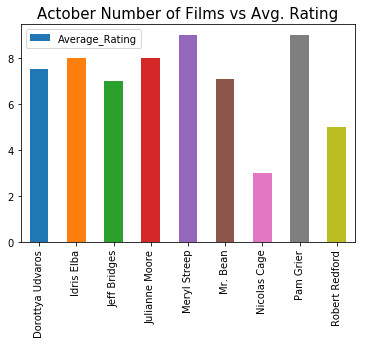

In [18]:
%matplotlib inline
ax=df.plot(kind='bar',use_index=True,y='Average_Rating')
ax.set_title('Actober Number of Films vs Avg. Rating',size=15);


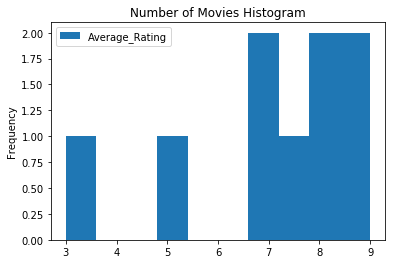

In [20]:
ax=df.plot(kind='hist',x='Number_of_Movies',legend=True)
ax.set_title('Number of Movies Histogram');

# Part II: Surviving The Titanic

Pandas has great data manipulation abilities. Let's finally consider some real data first. First we are going to consider passenger data from the Titanic, a famous ship which sunk on its maiden voyage. Of 2,224 passengers and crew, more than 1,500 died.

This is how the file looks like:

In [24]:
!head titanic.csv 

'head' is not recognized as an internal or external command,
operable program or batch file.


Reading from a csv in pandas is very easy! `read_csv` is very flexible: can take `txt`, plain files, and many more.

In [25]:
df=pd.read_csv('titanic.csv',header=0,sep=',')

`header = 0` indicates that the first row is the header. In this case it is not necessary. `sep` is the column seperator, other examples include tabs (\t), white space, |, and more

Head method reads the first five rows:

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Tail method reads the last five rows:

In [27]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Some more information about the data:
- Pclass: passenger class. 
- SibSp: number of siblings+spouses aboard
- Parch: number of parents+children aboard
- Fare: cost of ticket
- Cabin: room ID, if passenger had a room
- Embarked: port of departure (C= Cherbourg; Q= Queenstown; S=Southampton)

### Let's check out a few data exploration techniques

In [28]:
#describe numeric columns 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### We can also visualize pairs of variables quickly

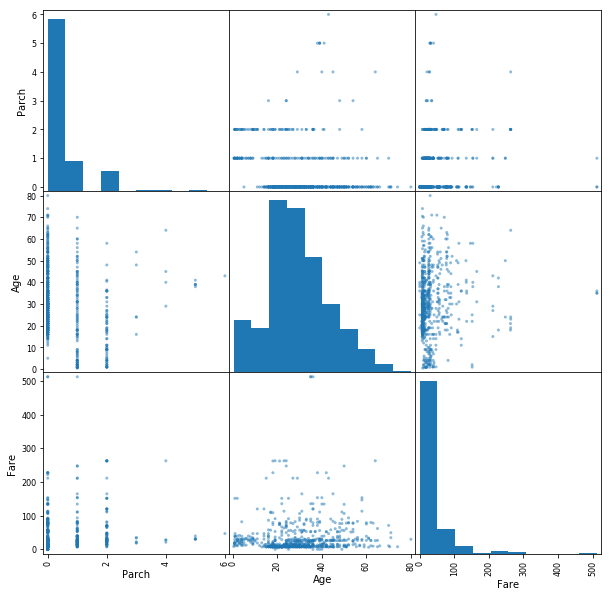

In [29]:
pd.plotting.scatter_matrix(df[['Parch','Age','Fare']],figsize=(10,10));

### Pandas has powerful grouping methods. Let's check out the average survival rate by passenger class

In [30]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### What about "women and children first"? Does sex influence survival rate?

In [31]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Let's combine the two: groupby both class and sex, and calculate the survival rates.

In [32]:
survived_by_class_and_sex=df.groupby(['Pclass','Sex'])['Survived'].mean()
survived_by_class_and_sex

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

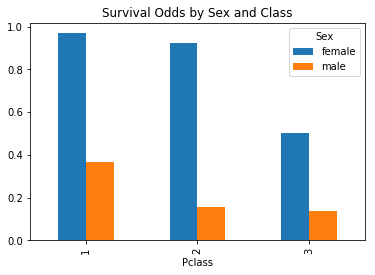

In [33]:
#check out what unstack does in a new cell!
survived_by_class_and_sex.unstack(1).plot(kind='bar',title='Survival Odds by Sex and Class');

### What does unstack() do to grouped data? Try unstack(0), unstack(1) and unstack(2) and explain the difference.

### Subsetting the data is also simple

In [34]:
under_30=df[df['Age']<30]
under_30.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
below_average_fare = df[df['Fare']<df['Fare'].mean()]
below_average_fare.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [36]:
#Cherbourg is in France
males_from_france = df[(df['Embarked']=='C')&(df['Sex']=='male')]
males_from_france.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [37]:
#use the isnull() method on a Series to get NaNs
survivors_unknown_age=df[(df['Age'].isnull())&(df['Survived']==1)]
survivors_unknown_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


### We can also create new columns! Let's count the reverends on board

In [38]:
#define a helper function:
def is_rev(input_name):
    if 'Rev.' in input_name:
        return 1  
    else:
        return 0

sum(df['Name'].apply(is_rev))

6

In [43]:
#to define a new column:
df['is_reverend']=df['Name'].apply(is_rev)

In [45]:
df[df["is_reverend"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_reverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,1


In [72]:
#check the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_reverend'],
      dtype='object')

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_reverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


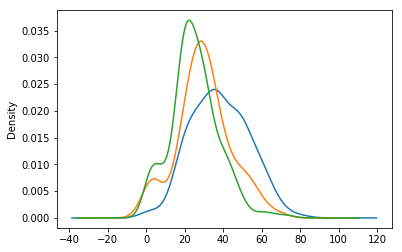

In [47]:
#df.groupby('Pclass').Age.hist();
df.groupby('Pclass').Age.plot(kind='kde');

## Exercises: Investigate the data.
- What is the distribution of ages? Plot it in a histogram. 
- Calculate the number of missing values (NaNs) in a column. Remember that a Pandas series (which is what a column in a dataframe is) is very similar to a numpy array. 
- Is the age variable missing at random? Compare Survived and Pclass for missing and non-missing Age passengers.
- Fill in missing values in the Age column with a good guess (say with the average of the observed Ages, or for more advanced pythonistas (pandanistas?) with the average of the observed Ages in each Pclass). 

----

- Add a new column, fancy_title, by writing a function that checks the passenger name for a fancy title like "Master" or "Colonel" or "Count".
- Create a new column, family_on_board, by consider both the SibSp and Parch columns
- Create an original column of your own from any column(s).

---
- get into groupby: figure out how to groupby multiple columns with multiple aggregation functions: i.e. groupby Pclass and calculate the mean and variance of Fare and the count of is_reverend. 
- plot your data, check out the .corr() method, and make some hypotheses: besides class and gender, what predicted survival?

---
- Advanced (for economists/social scientists): explore the statsmodels package and run some regressions.

In [62]:
sum(np.isnan(df["Age"]))

177

In [68]:
df.groupby(np.isnan(df['Age']))['Survived'].mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [97]:
df.groupby(np.isnan(df['Age']))['Pclass'].apply(lambda x: sum(x == 1))

Age
False    186
True      30
Name: Pclass, dtype: int64

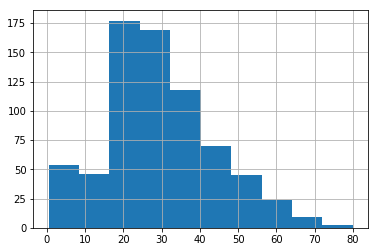

In [49]:
df.Age.hist()
#df.groupby('Pclass').Age.hist()

## New data!
### By some luck we found new data: 418 new passengers! Figure out how to combine the two dataframes, and rerun your favorite analysis performed above. Hint: look up Pandas concat.

In [42]:
df2= pd.read_csv('titanic2.csv')
print(len(df2))
df2.head()

418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exercise: predict the chances of survival of these new arrivals using their age, sex, and pclass. Specifically:

First using the old data:

1) bin the age variable into 3 groups (young, middle-aged, old),

2) calculate the average rate of survival for people in each age/sex/pclass group, 

Then on the new data:

3) infer the chance of survival of each of the new passengers using these averages.

4) plot a histogram of the estimated survivial chances for the new passengers